In [155]:
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np
from typing import Dict, Tuple
from scipy import stats
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, cross_validate, KFold, LeaveOneOut, GridSearchCV,learning_curve,validation_curve
import time
%matplotlib inline 
sns.set(style="ticks")

In [2]:
data = pd.read_csv('iris.data.txt', sep=',')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
ClassCoded = data[['class']]
LaEnc = LabelEncoder()
data[['class']] = pd.DataFrame(LaEnc.fit_transform(ClassCoded), columns=['class'])
data.head()

C:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
# Разделим датасет на обучающий (train) и тестовый (test) набор
trainX, testX, trainY, testY = train_test_split(data[['sepal_length','sepal_width','petal_length','petal_width']],data['class'], test_size=0.3, random_state = 1)
print('Число строк обучающего и тестового наборов:')
print('  Обучающий: {0} ({1} %)'.format(trainX.shape[0], round(trainX.shape[0]/data.shape[0]*100,4)))
print('  Тестовый: {0} ({1} %)'.format(testX.shape[0], round(testX.shape[0]/data.shape[0]*100,4)))

Число строк обучающего и тестового наборов:
  Обучающий: 105 (70.0 %)
  Тестовый: 45 (30.0 %)


In [7]:
# Проведём обучение 3 моделей с различным числом соседей
Classifier3N = KNeighborsClassifier(n_neighbors = 3)
Classifier3N.fit(trainX,trainY)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [8]:
# Оценка качества обучения модели.
Nb3Score = round(Classifier3N.score(testX,testY)*100, 4)
print('Классификатор с 3 соседями: {} %'.format(Nb3Score))

Классификатор с 3 соседями: 97.7778 %


In [12]:
Results3N = Classifier3N.predict(testX)
accuracy_score(testY, Results3N)

0.9777777777777777

In [49]:
# Рассмотрим результаты для каждого класса отдельно
resultDF = {
        'Prediction': Results3N,
        'Answer': testY
}
ResultData = pd.DataFrame(resultDF, columns = ['Prediction','Answer'])
Classes = np.unique(testY)
for c in Classes:
    temp_data_flt = ResultData[ResultData['Answer']==c]
    temp_acc = accuracy_score(
        temp_data_flt['Answer'].values, 
        temp_data_flt['Prediction'].values)
    print('Результат для класса {0}: {1} %'.format(c, round(temp_acc*100, 4)))

Результат для класса 0: 100.0 %
Результат для класса 1: 100.0 %
Результат для класса 2: 92.3077 %


In [119]:
ClassReport3N = classification_report(testY, Results3N, output_dict = True)
for ReportName,ReportResult in ClassReport3N.items():
    print('\nClass :',ReportName)
    for result0, result1 in ReportResult.items():
        print('   {0} : \t{1}'.format(result0, result1))       


Class : 0
   precision : 	1.0
   recall : 	1.0
   f1-score : 	1.0
   support : 	14

Class : 1
   precision : 	0.9473684210526315
   recall : 	1.0
   f1-score : 	0.972972972972973
   support : 	18

Class : 2
   precision : 	1.0
   recall : 	0.9230769230769231
   f1-score : 	0.9600000000000001
   support : 	13

Class : micro avg
   precision : 	0.9777777777777777
   recall : 	0.9777777777777777
   f1-score : 	0.9777777777777777
   support : 	45

Class : macro avg
   precision : 	0.9824561403508771
   recall : 	0.9743589743589745
   f1-score : 	0.9776576576576578
   support : 	45

Class : weighted avg
   precision : 	0.9789473684210527
   recall : 	0.9777777777777777
   f1-score : 	0.9776336336336338
   support : 	45


In [98]:
# Кросс-валидация
# Стратифицированная K-Fold перекрёстная проверка
Scores1 = cross_val_score(Classifier3N, data[['sepal_length','sepal_width','petal_length','petal_width']],data['class'], cv = 3)
print('Результаты нестратифицированной перекрёстной проверки:')
for Sc in Scores1:
    print('    {} %'.format(round(Sc*100,4)))
print('Средний результат нестратифицированной перекрёстной проверки: {} %\n'.format(round(Scores1.mean()*100,4)))
# Результат не точен из-за распределения классов в датасете
# Для решения данной проблеммы применим стратифицированную перекрёстную проверку
kfold = KFold(n_splits = 3, shuffle = True, random_state=0)
KFoldStartTime = time.time()
Scores2 = cross_val_score(Classifier3N, data[['sepal_length','sepal_width','petal_length','petal_width']],data['class'], cv = kfold)
KFoldStopTime = time.time()
print('Результаты стратифицированной перекрёстной проверки:')
for Sc in Scores2:
    print('    {} %'.format(round(Sc*100,4)))
print('Средний результат стратифицированной перекрёстной проверки: {} %'.format(round(Scores2.mean()*100,4)))

Результаты нестратифицированной перекрёстной проверки:
    98.0392 %
    96.0784 %
    100.0 %
Средний результат нестратифицированной перекрёстной проверки: 98.0392 %

Результаты стратифицированной перекрёстной проверки:
    96.0 %
    94.0 %
    96.0 %
Средний результат стратифицированной перекрёстной проверки: 95.3333 %


In [104]:
# Перекрёстная проверка с исключением по одному
loo = LeaveOneOut()
LOOStartTime = time.time()
Scores3 = cross_val_score(Classifier3N, data[['sepal_length','sepal_width','petal_length','petal_width']], data['class'], cv = loo)
LOOStopTime = time.time()
print('Средний результат перекрёстной проверки  с исключением по одному: {} %'.format(round(Scores3.mean()*100,4)))
print('Время выполнения стратифицированной перекрёстной проверки:{} с'.format(round(KFoldStopTime-KFoldStartTime,4)))
print('Время выполнения перекрёстной проверки с исключением по одному:{} с'.format(round(LOOStopTime-LOOStartTime,4)))

Средний результат перекрёстной проверки  с исключением по одному: 96.0 %
Время выполнения стратифицированной перекрёстной проверки:0.019 с
Время выполнения перекрёстной проверки с исключением по одному:0.538 с


In [126]:
# Оптимизаия гиперпараметров
NeighborsArr = np.array(range(1,16))
tuned_parameters = [{'n_neighbors':NeighborsArr}]
ClassifierGS = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=loo, scoring='accuracy')
ClassifierGS.fit(data[['sepal_length','sepal_width','petal_length','petal_width']], data['class'])

GridSearchCV(cv=LeaveOneOut(), error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [143]:
GSBP = ClassifierGS.best_params_.get('n_neighbors')
GSBP

10

In [145]:
ClassifierGSBP = KNeighborsClassifier(n_neighbors = GSBP)
ClassifierGSBP.fit(trainX,trainY)
ResultsGSBP = ClassifierGSBP.predict(testX)
ClassReport5N = classification_report(testY, ResultsGSBP, output_dict = True)
for ReportName,ReportResult in ClassReport5N.items():
    print('\nClass :',ReportName)
    for result0, result1 in ReportResult.items():
        print('   {0} : \t{1}'.format(result0, result1))


Class : 0
   precision : 	1.0
   recall : 	1.0
   f1-score : 	1.0
   support : 	14

Class : 1
   precision : 	1.0
   recall : 	0.9444444444444444
   f1-score : 	0.9714285714285714
   support : 	18

Class : 2
   precision : 	0.9285714285714286
   recall : 	1.0
   f1-score : 	0.962962962962963
   support : 	13

Class : micro avg
   precision : 	0.9777777777777777
   recall : 	0.9777777777777777
   f1-score : 	0.9777777777777777
   support : 	45

Class : macro avg
   precision : 	0.9761904761904763
   recall : 	0.9814814814814815
   f1-score : 	0.9781305114638448
   support : 	45

Class : weighted avg
   precision : 	0.9793650793650793
   recall : 	0.9777777777777777
   f1-score : 	0.9778718400940623
   support : 	45


In [146]:
# Кривые обучения и валидации
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'C:\\Anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

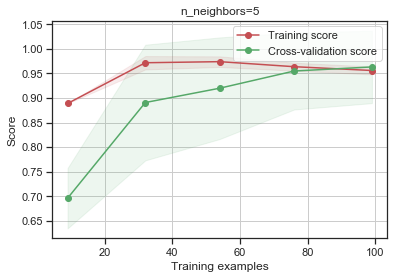

In [151]:
plot_learning_curve(KNeighborsClassifier(n_neighbors=5), 'n_neighbors={}'.format(5), 
                    trainX, trainY, cv=20)

In [152]:
def plot_validation_curve(estimator, title, X, y, 
                          param_name, param_range, cv, 
                          scoring="accuracy"):
                                                   
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring, n_jobs=1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'C:\\Anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

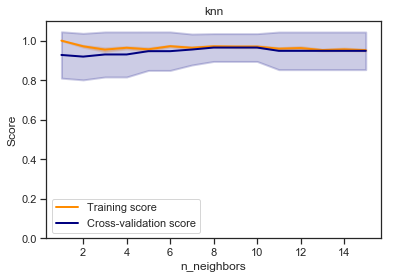

In [156]:
plot_validation_curve(KNeighborsClassifier(), 'knn', 
                      trainX, trainY, 
                      param_name='n_neighbors', param_range=NeighborsArr, 
                      cv=20, scoring="accuracy")